# Projekat 2 - nenadgledano učenje

Cilj: segmentacija kupaca prema njihovom potrošačkom profilu. 

Klasterizacijom možemo grupisati kupce na osnovu njihovog ponašanja pri kupovini (koliko često kupuju, koliko troše, koje kategorije preferiraju).

Mogu se uzeti u obzir tri ključna faktora: 
- skorašnjost (recency - kada su poslednji put kupovali)
- učestalost (frequency - koliko često kupuju) 
- potrošnja (monetary - koliko novca troše)

# Preprocesiranje

### Importovanje biblioteka

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import math

### Učitavanje podataka

In [11]:
df=pd.read_csv("Ecommerce_Sales_Data_2024_2025.csv")

### Dimenzije dataset-a

In [12]:
df.shape

(5000, 14)

In [21]:
df.columns.tolist()

['Order ID',
 'Order Date',
 'Customer Name',
 'Region',
 'City',
 'Category',
 'Sub-Category',
 'Product Name',
 'Quantity',
 'Unit Price',
 'Discount',
 'Sales',
 'Profit',
 'Payment Mode']

### Prikaz kolona

### Prikaz prvih 5 redova

In [13]:
df.head()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
0,10001,2024-10-19,Kashvi Varty,South,Bangalore,Books,Non-Fiction,Non-Fiction Ipsum,2,36294,5,68958.6,10525.09,Debit Card
1,10002,2025-08-30,Advik Desai,North,Delhi,Groceries,Rice,Rice Nemo,1,42165,20,33732.0,6299.66,Debit Card
2,10003,2023-11-04,Rhea Kalla,East,Patna,Kitchen,Juicer,Juicer Odio,4,64876,20,207603.2,19850.27,Credit Card
3,10004,2025-05-23,Anika Sen,East,Kolkata,Groceries,Oil,Oil Doloribus,5,37320,15,158610.0,36311.02,UPI
4,10005,2025-01-19,Akarsh Kaul,West,Pune,Clothing,Kids Wear,Kids Wear Quo,1,50037,10,45033.3,9050.04,Debit Card


### Prikaz zadnjih 5 redova

In [14]:
df.tail()

,Order ID,Order Date,Customer Name,Region,City,Category,Sub-Category,Product Name,Quantity,Unit Price,Discount,Sales,Profit,Payment Mode
4995,14996,2024-06-25,Nishith Kulkarni,East,Kolkata,Books,Fiction,Fiction Veritatis,3,60671,0,182013.0,11853.15,Debit Card
4996,14997,2024-12-22,Aaina Chander,North,Jaipur,Toys,Doll,Doll Nulla,5,70048,0,350240.0,31237.23,Credit Card
4997,14998,2025-04-15,Dhanush Gara,South,Bangalore,Beauty,Lipstick,Lipstick Eaque,1,42162,15,35837.7,7827.50,Debit Card
4998,14999,2024-07-08,Divyansh Malhotra,East,Kolkata,Electronics,Smartwatch,Smartwatch Adipisci,4,13568,10,48844.8,6603.86,Credit Card
4999,15000,2024-02-04,Aarush Walla,West,Goa,Clothing,Kids Wear,Kids Wear Repellat,1,76762,10,69085.8,5785.85,Net Banking


### Opis atributa dataset-a

Order ID – jedinstveni identifikator porudžbine

Order Date  – datum porudžbine

Customer Name – ime kupca

Region – prodajni region

City – grad kupovine

Category – glavna kategorija proizvoda

Sub-Category – podkategorija proizvoda

Product Name – naziv proizvoda

Quantity – kupljena količina

Unit Price – cena po jedinici

Discount – iznos popusta u procentima

Sales – ukupna vrednost porudžbine

Profit – ukupni profit za narudžbinu

Payment Mode – način plaćanja

### Prikaz tipova podataka

In [15]:
df.dtypes

Order ID           int64
Order Date        object
Customer Name     object
Region            object
City              object
Category          object
Sub-Category      object
Product Name      object
Quantity           int64
Unit Price         int64
Discount           int64
Sales            float64
Profit           float64
Payment Mode      object
dtype: object

### Prikaz informacija o podacima

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       5000 non-null   int64  
 1   Order Date     5000 non-null   object 
 2   Customer Name  5000 non-null   object 
 3   Region         5000 non-null   object 
 4   City           5000 non-null   object 
 5   Category       5000 non-null   object 
 6   Sub-Category   5000 non-null   object 
 7   Product Name   5000 non-null   object 
 8   Quantity       5000 non-null   int64  
 9   Unit Price     5000 non-null   int64  
 10  Discount       5000 non-null   int64  
 11  Sales          5000 non-null   float64
 12  Profit         5000 non-null   float64
 13  Payment Mode   5000 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 547.0+ KB


### Provera da li postoje nedostajuće vrednosti

In [17]:
df.isna().sum()

Order ID         0
Order Date       0
Customer Name    0
Region           0
City             0
Category         0
Sub-Category     0
Product Name     0
Quantity         0
Unit Price       0
Discount         0
Sales            0
Profit           0
Payment Mode     0
dtype: int64

### Provera da li postoje duplikati

In [18]:
duplicates=df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [19]:
print(f"Broj duplikata je: {duplicates.sum()}")

Broj duplikata je: 0


### Statistički opis

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Order ID,5000.0,12500.500000,1443.520003,10001.00,11250.7500,12500.500,13750.2500,15000.00
Quantity,5000.0,2.992600,1.413133,1.00,2.0000,3.000,4.0000,5.00
Unit Price,5000.0,39760.904600,22831.783946,222.00,20312.2500,39459.500,59721.7500,79998.00
Discount,5000.0,10.051000,7.084662,0.00,5.0000,10.000,15.0000,20.00
Sales,5000.0,106733.204870,85108.208202,264.10,39766.5375,83080.325,156968.5875,398485.00
Profit,5000.0,15941.746982,14897.684916,19.12,4892.2950,11108.525,22467.9875,89688.44


### Distribucija numeričkih kolona

In [22]:
numeric_cols = [c for c in ["Sales","Profit","Discount","Unit Price","Quantity"] if c in df.columns]

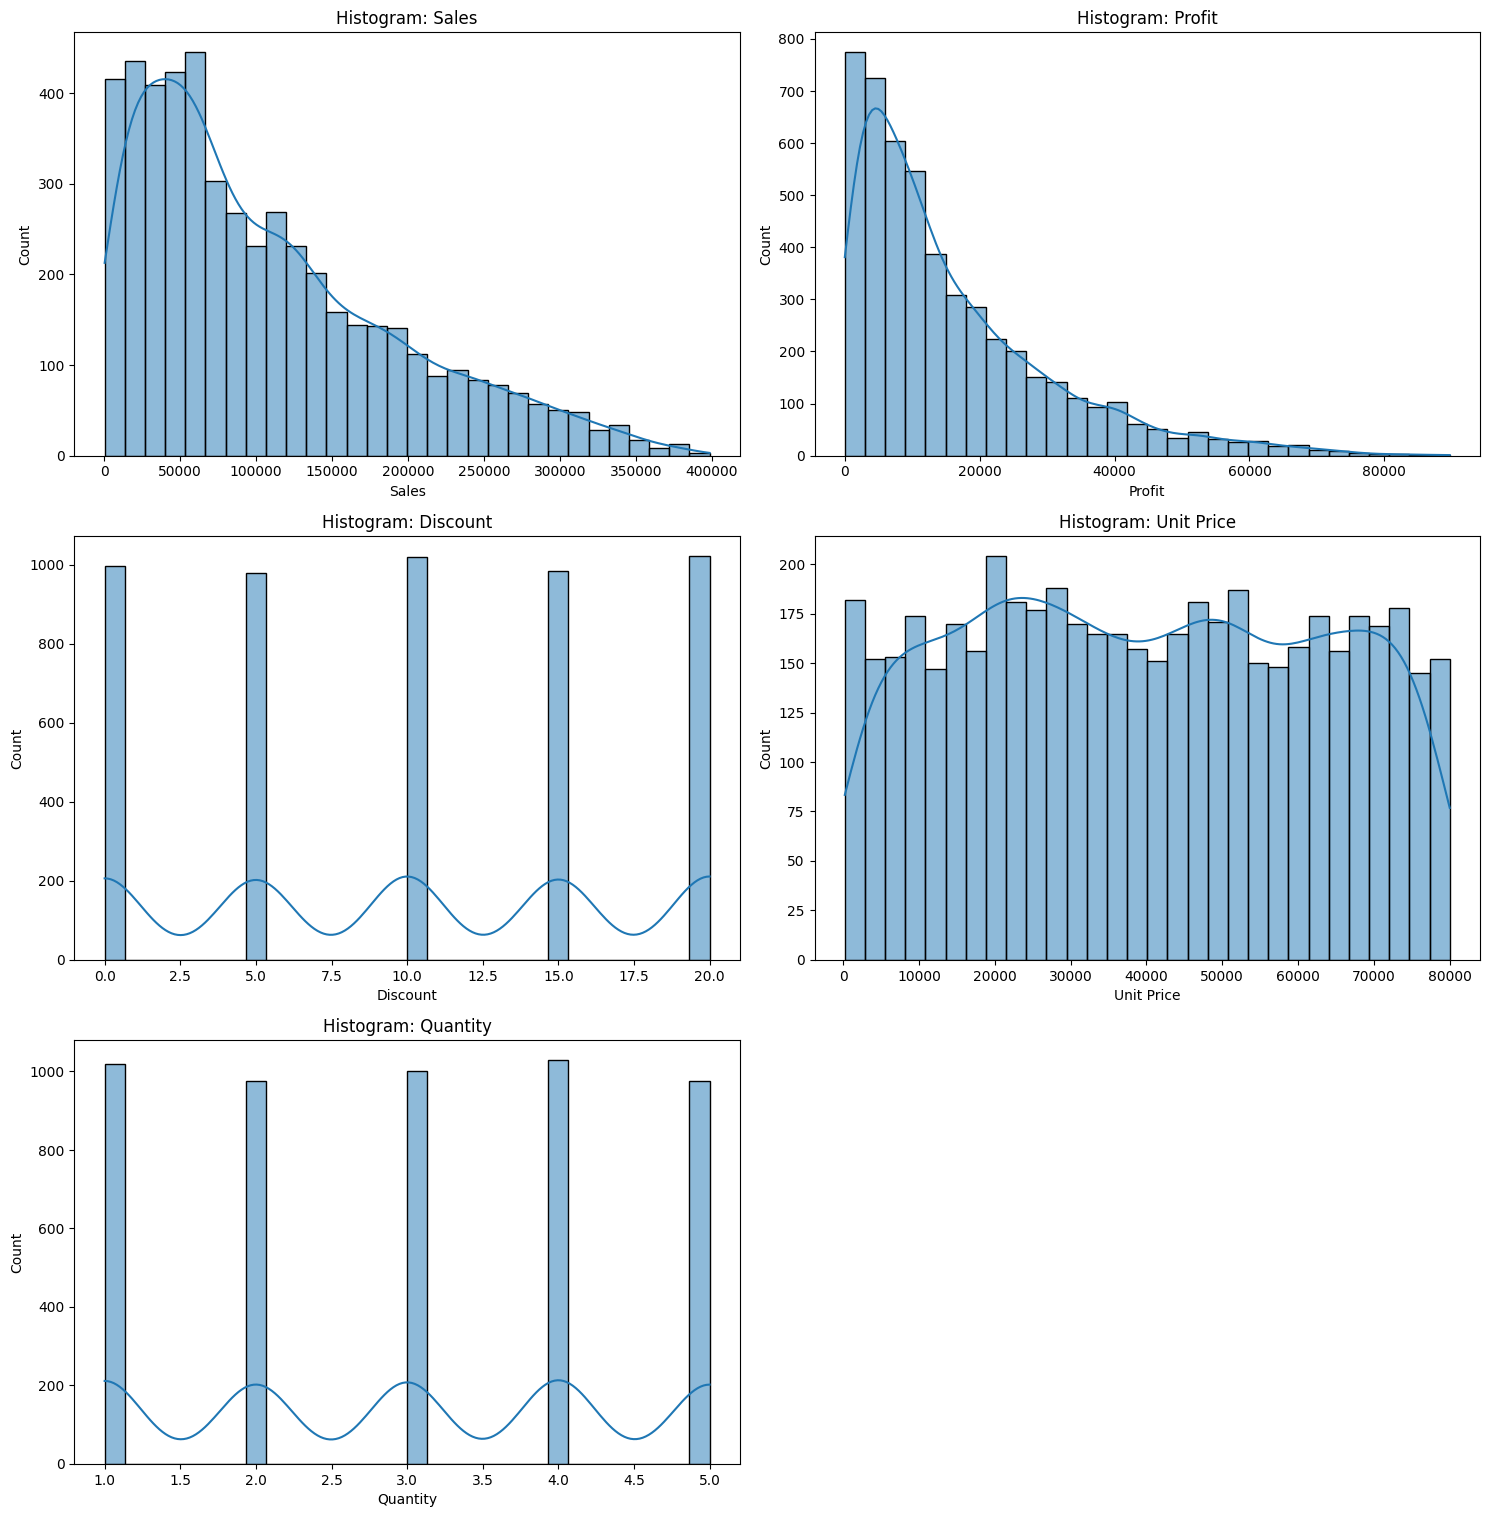

In [41]:
cols = 2 
rows = math.ceil(df.shape[1] / cols)

plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Histogram: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

### Zakrivljenost numeričkih kolona

In [40]:
df[['Quantity','Unit Price','Discount','Sales', 'Profit']].skew()

Quantity     -0.006055
Unit Price    0.023700
Discount     -0.008309
Sales         0.953198
Profit        1.504734
dtype: float64

Na osnovu grafika distribucije numeričkih kolona, kao i rezultata zakrivljenosti nakon izvršenja `skew()` metode, može se zaključiti sledeće:
- Quantity, Unit Price i Discount: imaju simetričnu distribuciju (≈ 0)
- Sales: Umerena desna zakrivljenost (> 0)
- Profit: Visoka desna zakrivljenost (> 0)

### Boxplot

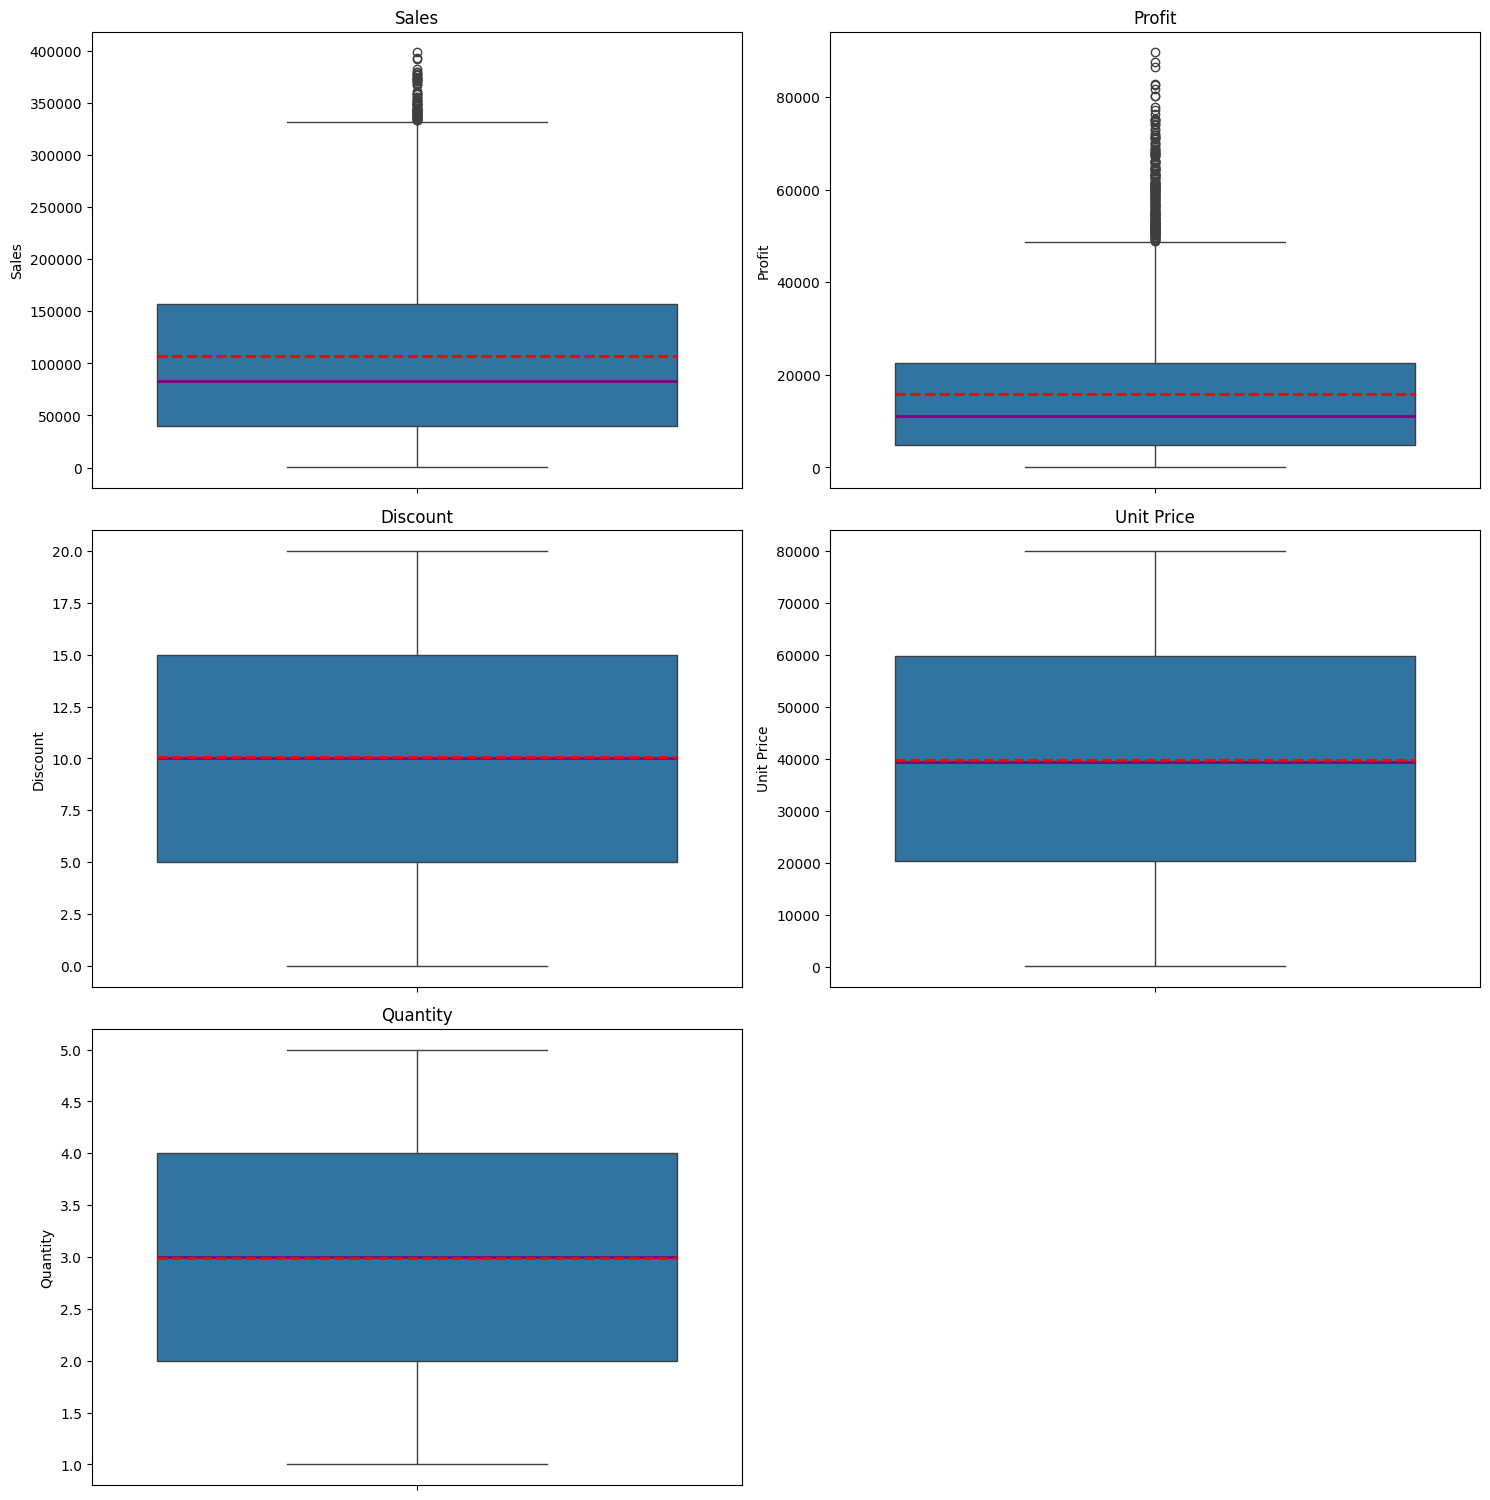

In [32]:
cols = 2 
rows = math.ceil(df.shape[1] / cols)

plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(numeric_cols):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(
        y=df[feature], 
        showmeans=True, 
        meanline=True,
        meanprops={'color': 'red', 'linewidth': 2},
        medianprops={'color': 'purple', 'linewidth': 2}
    )
    plt.title(f"{feature}")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Kategoričke kolone

In [42]:
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
cat_cols

['Customer Name',
 'Region',
 'City',
 'Category',
 'Sub-Category',
 'Product Name',
 'Payment Mode']

#### Najčešće vrednosti kategoričkih atributa

------------------------------------------


Category
Books          528
Kitchen        528
Furniture      527
Home Decor     515
Sports         511
Clothing       511
Toys           478
Electronics    472
Groceries      470
Beauty         460
Name: count, dtype: int64

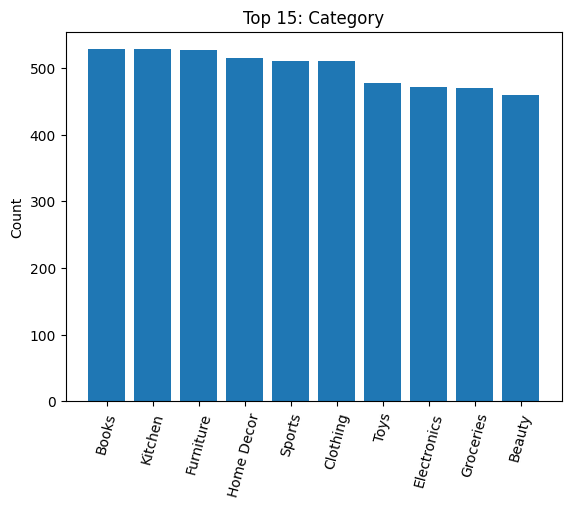

------------------------------------------


Sub-Category
Sofa             122
Football         120
Women's Wear     118
Bed              117
Lamp             117
Cookware Set     116
Biography        116
Juicer           115
Vase             114
Non-Fiction      114
Refrigerator     107
Tennis Racket    106
Face Cream       102
RC Car           101
Fiction          101
Name: count, dtype: int64

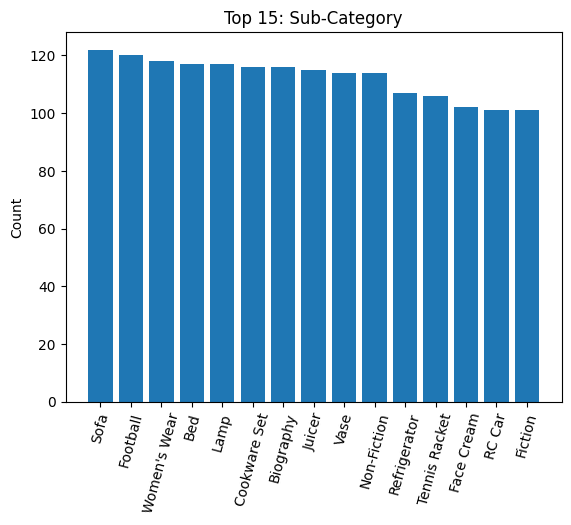

------------------------------------------


Region
North    1288
East     1256
West     1241
South    1215
Name: count, dtype: int64

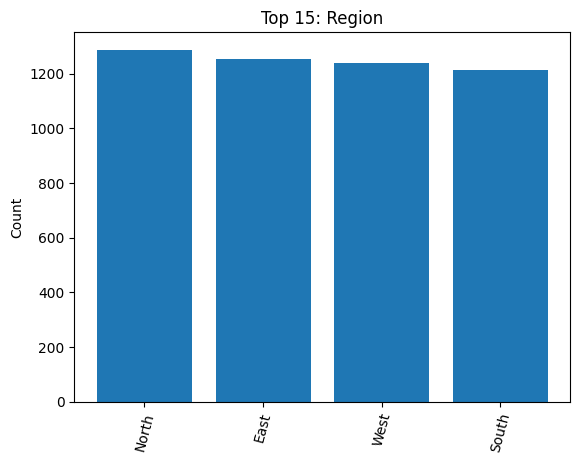

------------------------------------------


City
Guwahati       293
Chandigarh     276
Bangalore      261
Lucknow        261
Surat          261
Jaipur         261
Goa            259
Patna          258
Chennai        252
Bhubaneswar    249
Amritsar       248
Coimbatore     245
Delhi          242
Ahmedabad      241
Pune           240
Name: count, dtype: int64

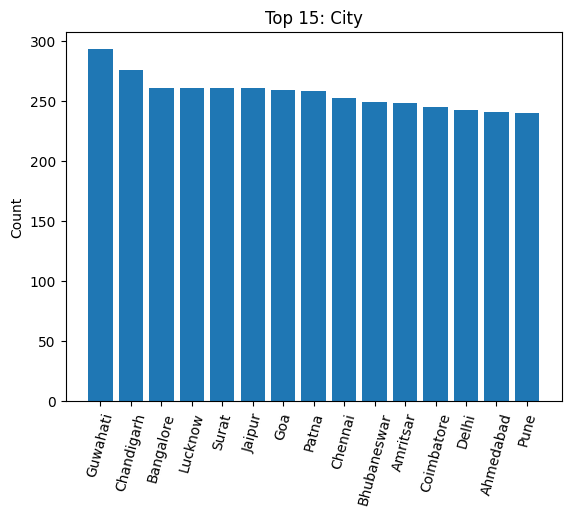

------------------------------------------


Payment Mode
Net Banking    1010
COD            1005
Debit Card     1003
Credit Card     994
UPI             988
Name: count, dtype: int64

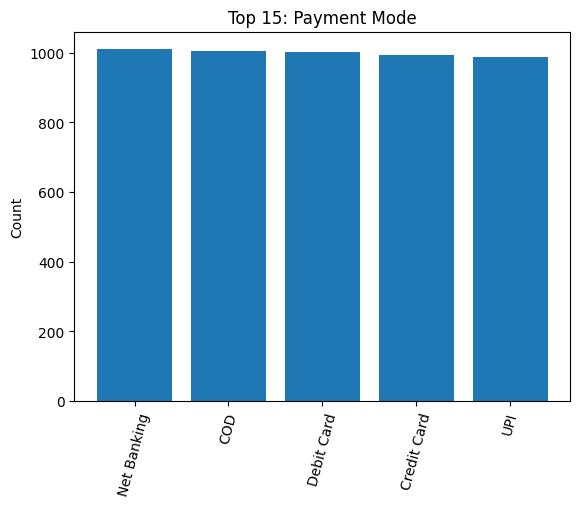

In [44]:
for col in [c for c in ["Category","Sub-Category","Region","City","Payment Mode"] if c in df.columns]:
    print("------------------------------------------")
    vc = df[col].value_counts(dropna=False).head(15)
    display(vc)

    plt.figure()
    plt.bar(vc.index.astype(str), vc.values)
    plt.title(f"Top 15: {col}")
    plt.xticks(rotation=75)
    plt.ylabel("Count")
    plt.show()

### Broj kupaca i raspodela transakcija po kupcu

In [54]:
print("Broj jedinstvenih kupaca:", df["Customer Name"].nunique())

Broj jedinstvenih kupaca: 4844


Customer Name
Aaryahi Madan      3
Vritika Cherian    3
Heer Tara          2
Anahi Date         2
Divij Kamdar       2
Jivin Sarkar       2
Kiaan Saini        2
Jivika Vohra       2
Divyansh Sarraf    2
Jayan Toor         2
Lakshay Bobal      2
Bhavin Som         2
Dhanush Cheema     2
Baiju Sandhu       2
Divyansh Thaman    2
Dharmajan Lal      2
Gokul Dixit        2
Eva Devan          2
Darshit Agrawal    2
Fateh Bakshi       2
dtype: int64


Broj kupaca po broju transakcija:
1    4690
2     152
3       2
Name: count, dtype: int64


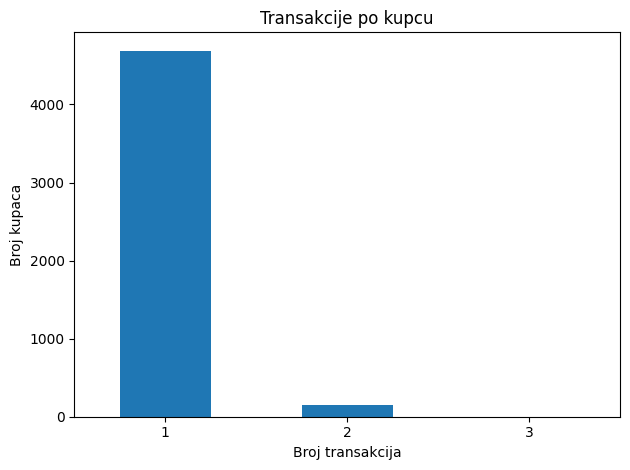

In [68]:
# Broj transakcija po kupcu
tx_per_customer = df.groupby("Customer Name").size().sort_values(ascending=False)
display(tx_per_customer.head(20))

print("\nBroj kupaca po broju transakcija:")
print(tx_per_customer.value_counts().sort_index())

plt.figure()
tx_per_customer.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Broj transakcija")
plt.ylabel("Broj kupaca")
plt.title("Transakcije po kupcu")

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()